In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysentani
import sentani as sti

In [2]:
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')

In [3]:
survey['access_type'] = pysentani.access_type(survey)

In [13]:
# renaming columns for simplicity
survey.rename(columns={'app_now/rice_cooker': 'Rice Cooker',
                                 'app_now/TV': 'TV',
                                 'app_now/fridge': 'Fridge',
                                 'app_now/fan':'Fan',
                                 'app_now/lighting': 'Lighting',
                                 'app_now/radio': 'Radio',
                                 'HP_y_n': 'Mobile Phone',
                                 'access_type': 'Access Type'},
                                 inplace = True)

# renaming columns for graphic display
survey.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                                       'community_microgrid': 'Community Microgrid',
                                                       'PLN_microgrid': 'PLN Microgrid',
                                                       'no_access': 'No Access'}},inplace = True)

# creates series of all appliance types
app_series = ['Rice Cooker','TV','Fridge','Fan','Lighting','Radio','Mobile Phone']


per_own_ls = []

# assigns access types to all in app_series
for apps in app_series:
    
    at_series = ['PLN Grid','PLN Microgrid','Community Microgrid','No Access'] 
    app_df = pd.crosstab(survey['Access Type'],survey[apps])
    
# calculates percent ownership 
    for ats in at_series:
        percent_ownership = (app_df[1.0][ats]/(app_df[1.0][ats] + app_df[0.0][ats])) * 100
        per_own_ls.append({'Access Type':ats,'appliance':apps,'percent_ownership':percent_ownership})

per_own_df = pd.DataFrame(per_own_ls)
per_own_df

,Access Type,appliance,percent_ownership
0,PLN Grid,Rice Cooker,27.640845
1,PLN Microgrid,Rice Cooker,1.265823
2,Community Microgrid,Rice Cooker,13.461538
3,No Access,Rice Cooker,3.112840
4,PLN Grid,TV,81.514085
5,PLN Microgrid,TV,81.012658
6,Community Microgrid,TV,92.307692
7,No Access,TV,79.766537
8,PLN Grid,Fridge,32.922535
9,PLN Microgrid,Fridge,3.797468


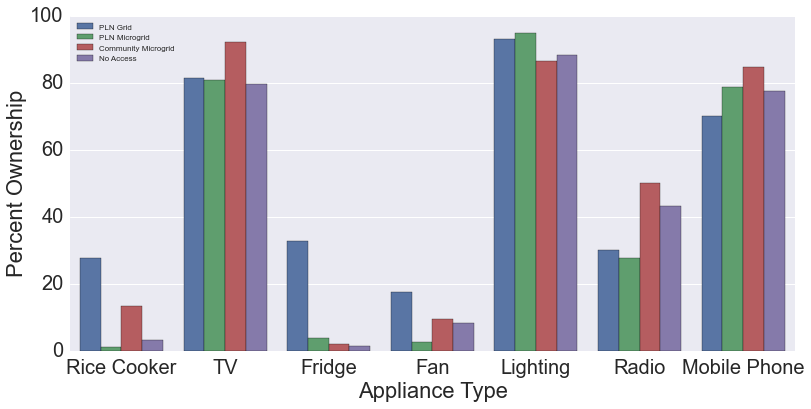

In [19]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x="appliance", y="percent_ownership", hue="Access Type", data=per_own_df)
sns.set_context('paper')
#ax.set_xticklabels(app_name_ls)
ax.set(xlabel='Appliance Type', ylabel='Percent Ownership')
plt.legend(loc='upper left')

plt.ylim(0,100)

fig.savefig('test.pdf')

In [20]:
!open test.pdf